In [90]:
import matplotlib.pyplot as plt
import json
import os

In [100]:
def load_times(files: list[str]) -> dict[str, tuple[list[float], list[float]]]:
    loaded_times = {}
    for filename in files:
        with open(filename, "r") as f:
            results_dict = json.load(f)
            loaded_times[results_dict["experiment_config"]["name"]] = results_dict

    return loaded_times

In [110]:
# all files in a results folder
files = [f"./results/{x}" for x in os.listdir("results")]
# files = [
#     "decode_20t_1p_compile_model_fn_compiled.json",
#     "decode_20t_1p_compile_model_fn.json",
# ]

times = load_times(files)

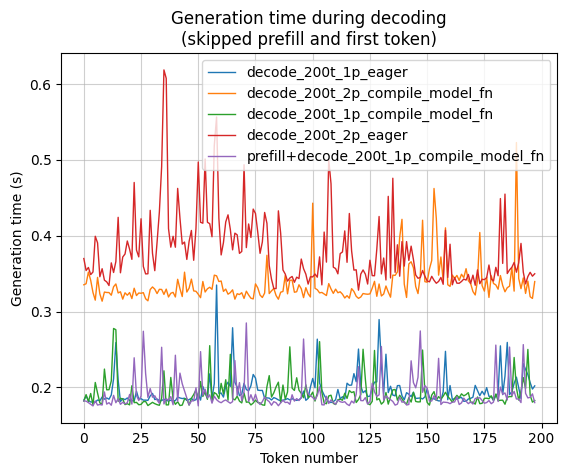

In [111]:
def show_gen_times(times):
    for key, value in times.items():
        gen_time_list = value["results"]["gen_time_list"]
        plt.plot(
            range(len(gen_time_list[2:])),
            gen_time_list[2:],
            label=key,
            linewidth=1,
        )
    plt.grid(alpha=0.6, zorder=1)
    plt.xlabel("Token number")
    plt.ylabel("Generation time (s)")
    plt.title("Generation time during decoding\n(skipped prefill and first token)")
    plt.legend()


show_gen_times(times)

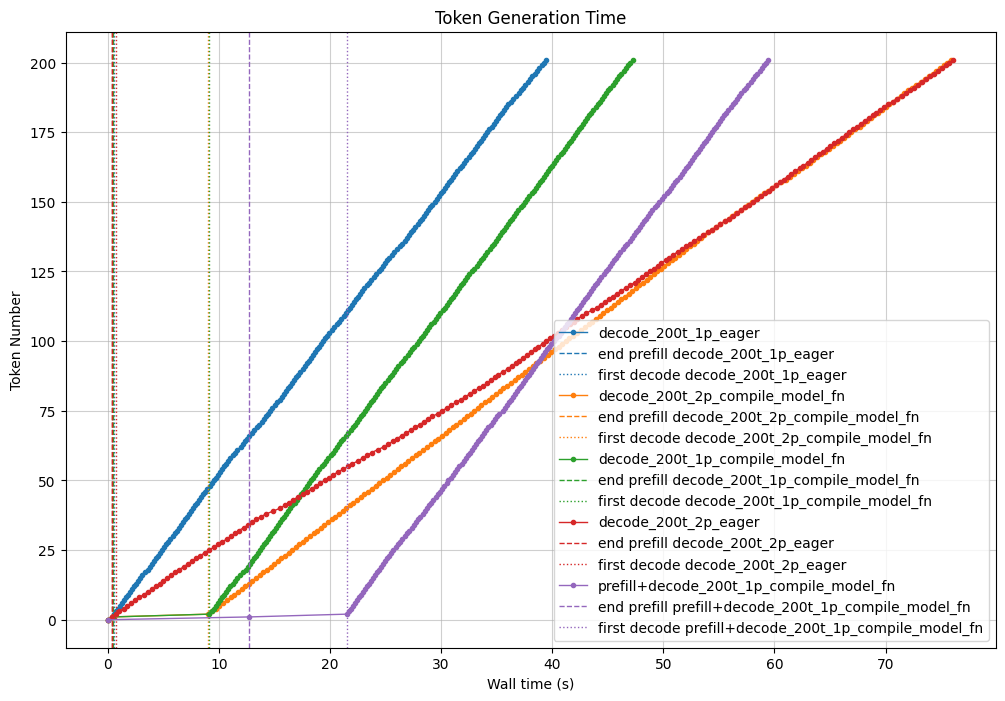

In [112]:
import matplotlib.pyplot as plt


def show_wall_times(times):
    fig = plt.figure(figsize=(12, 8))
    for key, value in times.items():

        (time_list, start_prefill, end_prefill) = (
            value["results"]["time_list"],
            value["results"]["start_prefill"],
            value["results"]["end_prefill"],
        )
        time_list = [0, end_prefill - start_prefill] + [
            x - start_prefill for x in time_list
        ]
        obj = plt.plot(
            time_list,
            range(len(time_list)),
            "-o",
            markersize=3,
            linewidth=1,
            label=key,
        )
        plt.axvline(
            end_prefill - start_prefill,
            linestyle="--",
            label=f"end prefill {key}",
            color=obj[0].get_color(),
            linewidth=1,
        )
        plt.axvline(
            time_list[2],
            linestyle=":",
            color=obj[0].get_color(),
            label=f"first decode {key}",
            linewidth=1,
        )
    plt.grid(alpha=0.6, zorder=1)
    plt.xlabel("Wall time (s)")
    plt.ylabel("Token Number")
    plt.title("Token Generation Time")
    plt.legend()


show_wall_times(times)